importing part 

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os






1:here img is PIL.JpegImagePlugin.JpegImageFile
2:we load pic using image(tensorflow.keras.preprocessing.image) with the help  of load_img method
3: here plt(matplotlib.pyplot) shows image on screen using method named imshow and img(our variable of pic) is passed in imshow

PIL.JpegImagePlugin.JpegImageFile

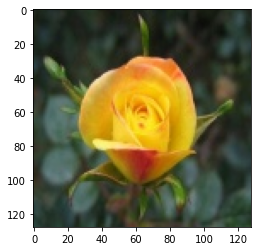

In [32]:
img=image.load_img("data/train/flower rose/ro (1).jpg")
plt.imshow(img)
type(img)

using cv2 we read pic and see its size i.e. height and width using .shop

In [33]:
cv2.imread("data/train/flower rose/ro (1).jpg").shape


(128, 128, 3)

In [34]:
train=ImageDataGenerator(rescale=1/127)
validation=ImageDataGenerator(rescale=1/127)

train_dataset=train.flow_from_directory("data/train/",target_size=(128,128),batch_size=5,class_mode='categorical')
val_dataset=train.flow_from_directory("data/val/",target_size=(128,128),batch_size=5,class_mode='categorical')

Found 210 images belonging to 7 classes.
Found 67 images belonging to 7 classes.


In [35]:
train_dataset.class_indices
val_dataset.class_indices

{'flower bougainvillea': 0,
 'flower frangipani': 1,
 'flower hibiscus': 2,
 'flower lotus': 3,
 'flower rose': 4,
 'flower sunflower': 5,
 'flower thorn_apple': 6}

In [36]:
train_dataset.classes
val_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6])

In [37]:
inputs =tf.keras.Input(shape=(128,128,3),name='input')

conv1=tf.keras.layers.Conv2D(filters=4,kernel_size=3,name='conv1')(inputs)
maxpool1=tf.keras.layers.MaxPool2D(name='maxpool1')(conv1)

conv2=tf.keras.layers.Conv2D(filters=8,kernel_size=3,name='conv2')(maxpool1)
maxpool2=tf.keras.layers.MaxPool2D(name='maxpool2')(conv2)

conv3=tf.keras.layers.Conv2D(filters=16,kernel_size=3,name='conv3')(maxpool2)
maxpool3=tf.keras.layers.MaxPool2D(name='maxpool3')(conv3)


avgpool=tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs =tf.keras.layers.Dense(7,activation='softmax',name='output')(avgpool)

model=tf.keras.Model(inputs=inputs,outputs=outputs)



In [38]:

keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [41]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)


history=model.fit(x=train_dataset,batch_size=4,epochs=8,validation_data=val_dataset)
#add below in model.fit to stop when model is not learning
#callbacks=[
#       tf.keras.callbacks.EarlyStopping(
#            monitor='val_loss',
#            patience=7,
#            restore_best_weights=True
#        )'''

Epoch 1/8
42/42 [==============================] - 2s 27ms/step - loss: 1.4103 - accuracy: 0.4286 - val_loss: 1.3011 - val_accuracy: 0.5075
Epoch 2/8
42/42 [==============================] - 1s 23ms/step - loss: 1.3668 - accuracy: 0.4619 - val_loss: 1.3062 - val_accuracy: 0.4328
Epoch 3/8
42/42 [==============================] - 1s 23ms/step - loss: 1.3893 - accuracy: 0.5238 - val_loss: 1.2906 - val_accuracy: 0.5373
Epoch 4/8
42/42 [==============================] - 1s 23ms/step - loss: 1.3460 - accuracy: 0.4857 - val_loss: 1.2792 - val_accuracy: 0.4478
Epoch 5/8
42/42 [==============================] - 1s 22ms/step - loss: 1.3426 - accuracy: 0.5286 - val_loss: 1.2889 - val_accuracy: 0.4776
Epoch 6/8
42/42 [==============================] - 1s 22ms/step - loss: 1.3294 - accuracy: 0.4952 - val_loss: 1.2465 - val_accuracy: 0.5224
Epoch 7/8
42/42 [==============================] - 1s 22ms/step - loss: 1.3446 - accuracy: 0.4619 - val_loss: 1.2910 - val_accuracy: 0.3881
Epoch 8/8
42/42 [===

In [ ]:
model.save('myFirstModel')

INFO:tensorflow:Assets written to: myFirstModel\assets


INFO:tensorflow:Assets written to: myFirstModel\assets


In [3]:
saved_model=keras.models.load_model('myFirstModel')

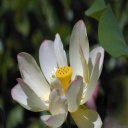

In [23]:
test_image = image.load_img('data/val/flower lotus/lotus (11).jpg', target_size = (128, 128))
test_image

In [24]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result = saved_model.predict(test_image)
new_prediction = np.argmax(result,axis=1)
if(new_prediction[0] ==0):
    print('bougainvillea')
if(new_prediction[0] ==1):
    print('frangipani')
if(new_prediction[0] ==2):
    print('hibiscus')

1/1 [==============================] - 0s 68ms/step
frangipani
